# Robotics Project

Name : Abdallah Atef Hefny

ID : 201364

In [1]:
# import useful lib
import numpy as np
import time
from coppeliasim_zmqremoteapi_client import RemoteAPIClient

# Forward Kinematics

In [2]:
# functions of forward kinematics
def FK(theta, alpha, a, d):
    #conversion of theta to radians
    theta = np.radians(theta)
    # cos and sin theta
    cth= np.cos(theta); sth= np.sin(theta)
    #conversion of alpha to radians 
    alpha= np.radians(alpha)
    # cos and sin alpha
    cal= np.cos(alpha); sal= np.sin(alpha)
    # This matrix is for DH transformation
    matrix = np.array([[cth,-sth*cal,sth*sal,a*cth] ,[sth,cth*cal,-sal*cth,a*sth] , [0,sal,cal,d] , [0,0,0,1]])
    return np.round(matrix,3)

# DH table

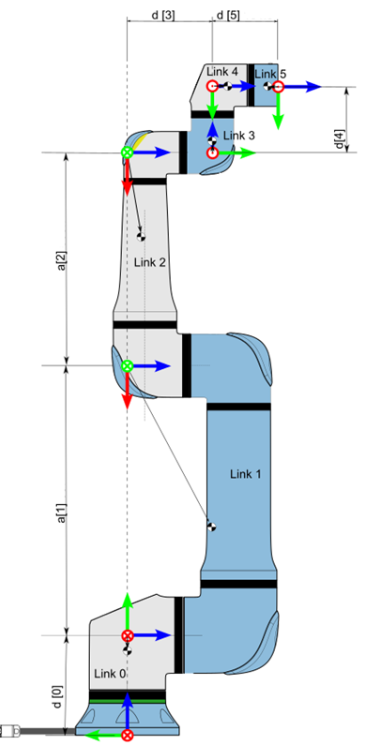

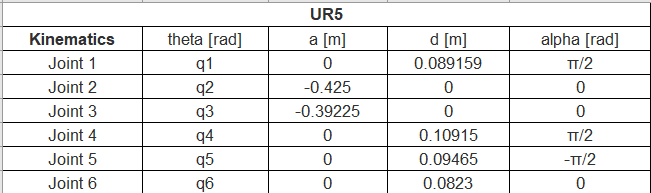

In [4]:
# Transformations of DH table
q = np.array([0,0,0,0,0,0])
for i in range(6):
    q[i] = input("please enter the %s angle" %str(i+1))
print(q)
T1 = FK(q[0], 90, 0, 0.089159)
T2 = FK(q[1], 0, -0.425, 0)
T3 = FK(q[2], 0, -0.39225, 0)
T4 = FK(q[3], 90, 0, 0.10915)
T5 = FK(q[4], -90, 0, 0.09465)
T6 = FK(q[5], 0, 0, 0.0823)

T0_6 = np.round(T1@T2@T3@T4@T5@T6,2)

print(T0_6)

please enter the 1 angle 10
please enter the 2 angle 20
please enter the 3 angle 30
please enter the 4 angle 40
please enter the 5 angle 50
please enter the 6 angle 60


[10 20 30 40 50 60]
[[-0.79 -0.61  0.11 -0.52]
 [-0.53  0.57 -0.63 -0.26]
 [ 0.32 -0.56 -0.77 -0.42]
 [ 0.    0.    0.    1.  ]]


In [17]:
client = RemoteAPIClient()
sim = client.require('sim')

defaultIdleFps = sim.getInt32Param(sim.intparam_idle_fps)
sim.setInt32Param(sim.intparam_idle_fps, 0)

1

In [18]:
#Getting names of joints 
joint_names = [f'joint_{i+1}' for i in range(6)]
#Handels of the joints
joint_handles=[sim.getObjectHandle(name) for name in joint_names]
#Assume that the EE is the connection of the last link with the end effector
EE_connection = sim.getObjectHandle("link_EE")
#Lets start
sim.addLog(sim.verbosity_scriptinfos, "Starting the program")

#Graph configuration

EE_graph = sim.getObjectHandle("graph")

EE_x = sim.addGraphStream(EE_graph,"End Effector X position","m",0,[0,1,1])
EE_y = sim.addGraphStream(EE_graph,"End Effector Y position","m",0,[0,0,1])
EE_z = sim.addGraphStream(EE_graph,"End Effector Z position","m",0,[0,1,0])

sim.addGraphCurve(EE_graph,"Position",3,[EE_x,EE_y,EE_z],[0,0,0],"m by m")

10000

In [19]:
# lets start the simulation
client.setStepping(False)
sim.startSimulation()
#enable the position control for all joints
for i in range(len(joint_handles)):
    sim.setObjectInt32Parameter(joint_handles[i],2001,~0)

for i in range(len(q)):
    sim.setJointTargetPosition(joint_handles[i],np.radians(q[i]))

Robotbase = joint_handles[0]
# position of the End Effector
EE_pos = sim.getObjectPosition(EE_connection,Robotbase)
print("position of the end effector is \n",EE_pos)
# transformation matrix
EE_T = np.round(sim.getObjectMatrix(EE_connection,Robotbase))
print("Transformation matrix of the arm from vrep",EE_T)
print("Transformation matrix of the arm from the calculations",T0_6)

ret=sim.getGraphCurve(EE_graph,0 ,0)
sim.stopSimulation()

# Restore the original idle loop frequency:
sim.setInt32Param(sim.intparam_idle_fps, defaultIdleFps)
print('Program ended')

position of the end effector is 
 [-0.17139643716453049, 0.04388880706694739, 0.9766187002170036]
Transformation matrix of the arm from vrep [-0. -0. -1. -0.  0.  1. -0.  0.  1. -0.  0.  1.]
Transformation matrix of the arm from the calculations [[-0.79 -0.61  0.11 -0.52]
 [-0.53  0.57 -0.63 -0.26]
 [ 0.32 -0.56 -0.77 -0.42]
 [ 0.    0.    0.    1.  ]]
Program ended
